In [1]:
# Imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pickle as pkl
from IPython.display import HTML
import os
mpl.rcParams.update({'font.size': 14})

In [2]:
CURRENT_PATH = os.getcwd()
DATA_PATH = os.path.abspath(os.path.join(CURRENT_PATH, "..", "..", "data"))

In [24]:
trial_id = 13
n_run = 100

# Load PINN outputs
with open('./pickles/pinn_loss_sherpa_' + str(n_run) + '_trial_id_' + str(trial_id) + '.pkl', 'rb') as file:
    pinn_loss = pkl.load(file)
    
with open('pickles/boundary_loss_sherpa_' + str(n_run) + '_trial_id_' + str(trial_id) + '.pkl', 'rb') as file:
    boundary_loss = pkl.load(file)
    
with open('pickles/predictions_sherpa_' + str(n_run) + '_trial_id_' + str(trial_id) + '.pkl', 'rb') as file:
    predictions = pkl.load(file)
    
with open(DATA_PATH + '/f_boundary.pkl', 'rb') as file:
    f_boundary = pkl.load(file)
    
with open(DATA_PATH + '/p.pkl', 'rb') as file:
    p = pkl.load(file)
    
with open(DATA_PATH + '/T.pkl', 'rb') as file:
    T = pkl.load(file)
    
with open(DATA_PATH + '/r.pkl', 'rb') as file:
    r = pkl.load(file)
    
with open(DATA_PATH + '/J.pkl', 'rb') as file:
    J = pkl.load(file)

In [25]:
# Scale prediction and f_boundary back to real space
f_bound = np.array([-34.54346331847909, 6.466899920699378], dtype='float32')
f_boundary = np.exp((f_boundary*np.abs(f_bound[1]-f_bound[0])) + f_bound[0])
predictions = np.exp((predictions*np.abs(f_bound[1]-f_bound[0])) + f_bound[0])

In [26]:
# Get properties
size = int(np.sqrt(predictions.shape[0]))
epochs = int(predictions.shape[2])

# Check data
print(f'F_boundary shape: {f_boundary.shape}, min: {np.min(f_boundary)}, max: {np.max(f_boundary)}')
print(f'Predictions shape: {predictions.shape}, min: {np.min(predictions[:, :, -1].reshape((size, size))[-1, :-1])}, max: {np.max(predictions[:, :, -1].reshape((size, size))[-1, :-1])}')

F_boundary shape: (512, 1), min: 9.953227070295088e-16, max: 643.4857432802897
Predictions shape: (262144, 1, 50), min: 1.3012298698930057e-15, max: 632.4095714304619


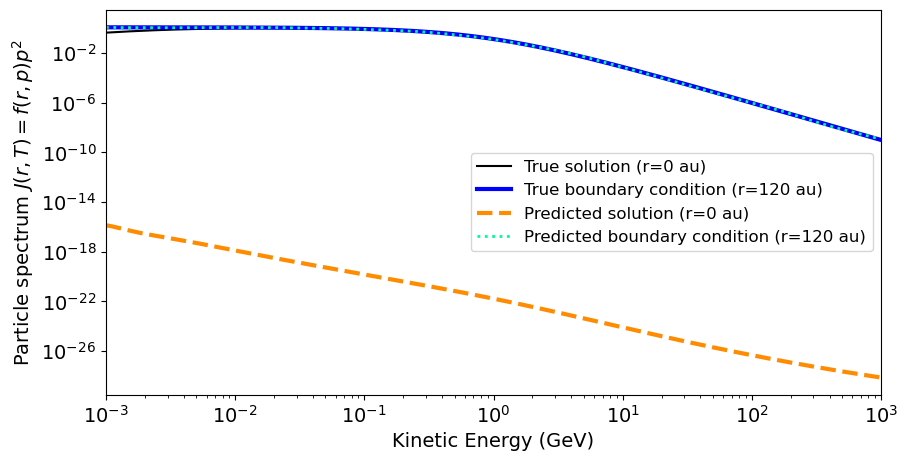

In [27]:
# Plot J(r, T)
fig, ax = plt.subplots(figsize=(10, 5))

ax.loglog(T, J[0, :], label=f'True solution (r={r[0, 0]/150e6:.0f} au)', c='k')
ax.loglog(T, J[-1, :], label=f'True boundary condition (r={r[-1, 0]/150e6:.0f} au)', c='blue', lw='3')
ax.loglog(T[:-1], np.expand_dims(predictions[:, :, -1].reshape((size, size))[0, :-1], axis=1)*(p[:-1]**2), label=f'Predicted solution (r={r[0, 0]/150e6:.0f} au)', c='darkorange', lw='3', ls='--')
ax.loglog(T[:-1], np.expand_dims(predictions[:, :, -1].reshape((size, size))[-1, :-1], axis=1)*(p[:-1]**2), label=f'Predicted boundary condition (r={r[-1, 0]/150e6:.0f} au)', c='mediumspringgreen', lw='2', ls=':')

ax.set_xlabel("Kinetic Energy (GeV)")
ax.set_ylabel("Particle spectrum $J(r, T) = f(r, p) p^2$")
ax.set_xlim(1e-3, 1e3)
# ax.set_ylim(1e-9, 2e0)
ax.legend(prop={'size': 12})

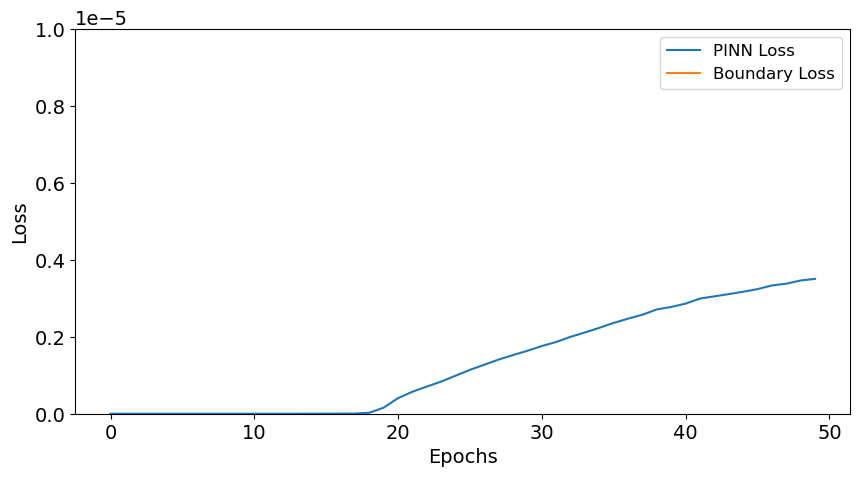

In [22]:
# Plot loss 
fig = plt.figure(figsize=(10, 5))

plt.plot(pinn_loss, label='PINN Loss')
plt.plot(boundary_loss, label='Boundary Loss')

plt.ylim(0, 1e-5)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(prop={'size': 12})

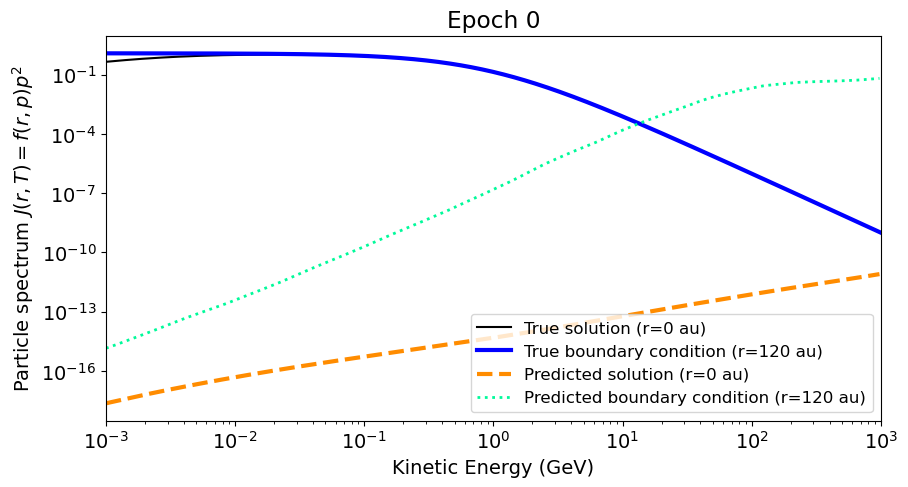

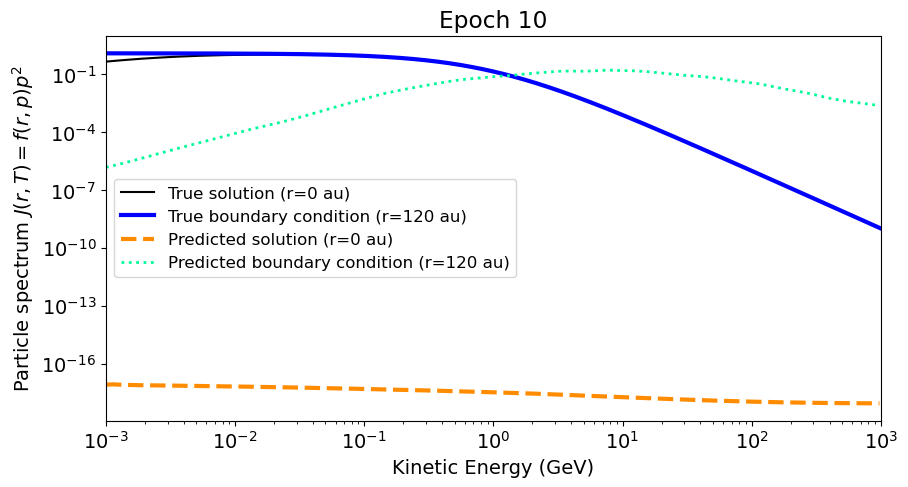

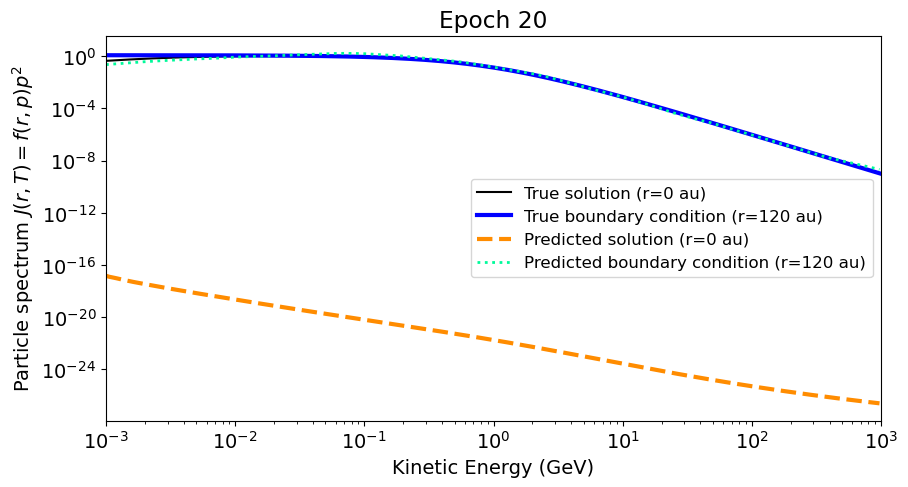

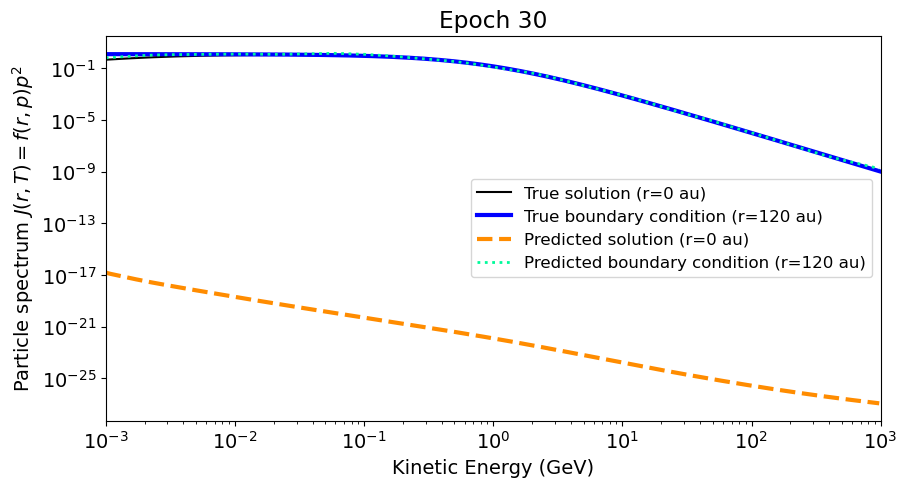

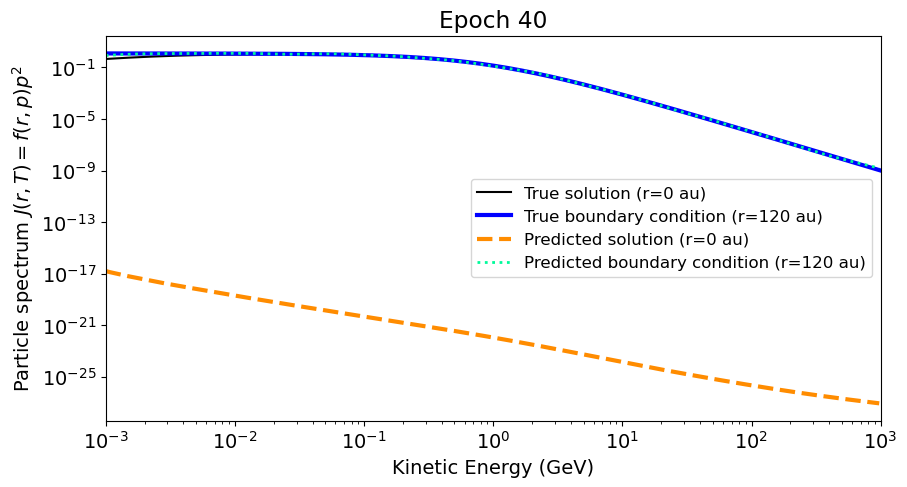

In [23]:
# Visualize J(r, T) over the epochs
for i in range(epochs):
    if (i%10 == 0):
        fig, ax = plt.subplots(figsize=(10, 5))
        
        ax.set_title("Epoch " + str(i))
        ax.set_xlabel("Kinetic Energy (GeV)")
        ax.set_ylabel("Particle spectrum $J(r, T) = f(r, p) p^2$")
        ax.set_xlim(1e-3, 1e3)
        # ax.set_ylim(1e-9, 2e0)
    
        ax.loglog(T, J[0, :], label=f'True solution (r={r[0, 0]/150e6:.0f} au)', c='k')
        ax.loglog(T, J[-1, :], label=f'True boundary condition (r={r[-1, 0]/150e6:.0f} au)', c='blue', lw='3')
        ax.loglog(T[:-1], np.expand_dims(predictions[:, :, i].reshape((size, size))[0, :-1], axis=1)*(p[:-1]**2), label=f'Predicted solution (r={r[0, 0]/150e6:.0f} au)', c='darkorange', lw='3', ls='--')
        ax.loglog(T[:-1], np.expand_dims(predictions[:, :, i].reshape((size, size))[-1, :-1], axis=1)*(p[:-1]**2), label=f'Predicted boundary condition (r={r[-1, 0]/150e6:.0f} au)', c='mediumspringgreen', lw='2', ls=':')

        ax.legend(prop={'size': 12})